In [1]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
with open('../../Downloads/to_save_personalized_523_tpl4rnf.pkl','rb') as f:
    personalized = pickle.load(f)

In [2]:
with open('../../Downloads/cases_to_plot_base_523_tdpl4r_38.pkl','rb') as f:
    pooled = pickle.load(f)

In [3]:
##within study variance
#sum_k=1^K(n_k * (\bar{x}_k - \bar{x})^2)
#where \bar{x}_k is the average regret in study k 
#k is an index of the study
#n_k is the number of people in the study
#\bar{x} is the average regret across all people and all studies


In [3]:
def group_by_time_stamp(case_dict):
    to_return={}
    
    for sim,data in case_dict.items():
        for date,results in data.items():
            if date not in to_return:
                to_return[date]={}
            to_return[date][sim]=results
    return to_return

In [4]:
grouped_pooled = group_by_time_stamp(pooled['case_two']['regrets'])

In [12]:
grouped_personalized= group_by_time_stamp(personalized['case_two']['regrets'])

NameError: name 'personalized' is not defined

In [5]:
def between_study_variance(a_time):
    to_return = []
    
    all_data = list(itertools.chain.from_iterable([v for v in a_time.values()]))
    print(len(all_data))
    print(sum([len(v) for v in a_time.values()]))
    print(32*50)
    xbar = np.array(all_data).mean()
    for gid,gdata in a_time.items():
        to_return.append(len(gdata)*(np.array(gdata).mean()-xbar)**2)
    return sum(to_return)

In [8]:
test = grouped_pooled[pd.Timestamp('2015-07-27 13:00:00')]

In [18]:
between_study_variance(test)

1282
1282
1600


3.6184335876237084

In [55]:
##between study variance ? 
#sum_k=1^K sum_i=1^n_k (x_{i,k}-\bar{x_k})^2
#k is an index of the study
#i is an index of the person
#n_k is the number of people in the study
#\bar{x} is the average regret across all people and all studies
#x_{i,k} is the observation of the ith person in the kth group


In [9]:
def within_study_variance(a_time):
    
    to_return = []
    for gid,gdata in a_time.items():
        this_mean = np.array(gdata).mean()
        temp = sum([(i-this_mean)**2 for i in gdata])
        to_return.append(temp)
    return sum(to_return)
    

In [10]:
def within_by_date(grouped):
    dates = sorted(grouped)
    to_return = [within_study_variance(grouped[a_time]) for a_time in dates]
    return to_return,dates
        

In [15]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [17]:
within_study_variance(test)

74.58769160738409

In [13]:
a,x = within_by_date(grouped_pooled)
#app,xpp = within_by_date(grouped_personalized)

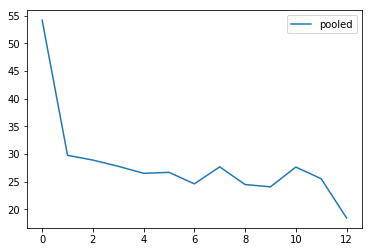

In [16]:
plt.plot(get_weekly_averages(a),label='pooled')
#plt.plot(get_weekly_averages(app),label='personalized')
plt.legend()